**Assigment 1 & 2 Selected Topics in AI One**

*   **Hussein Hesham Hussein Badawy  : 20190183**

*   **Nour El-Din Ahmed Ezzat        : 20190593**




Install fuzzy_c_means 

In [507]:
!pip install fuzzy_c_means 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import Libiraries

In [508]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from fcmeans import FCM 
from sklearn.cluster import KMeans

read data

In [509]:
df = pd.read_csv('../content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Encoding

In [510]:
#drop CustomerID 
df.drop(['CustomerID'], axis=1, inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [511]:
# (female : 0, male : 1)
gender_mapping = {"Female": 0, "Male": 1}
df['Gender'] = df['Gender'].map(gender_mapping)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


Analysis

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [513]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [514]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [515]:
gender_counts = df.Gender.value_counts()
print('0 --> Female , 1 --> Male')
gender_counts

0 --> Female , 1 --> Male


0    112
1     88
Name: Gender, dtype: int64

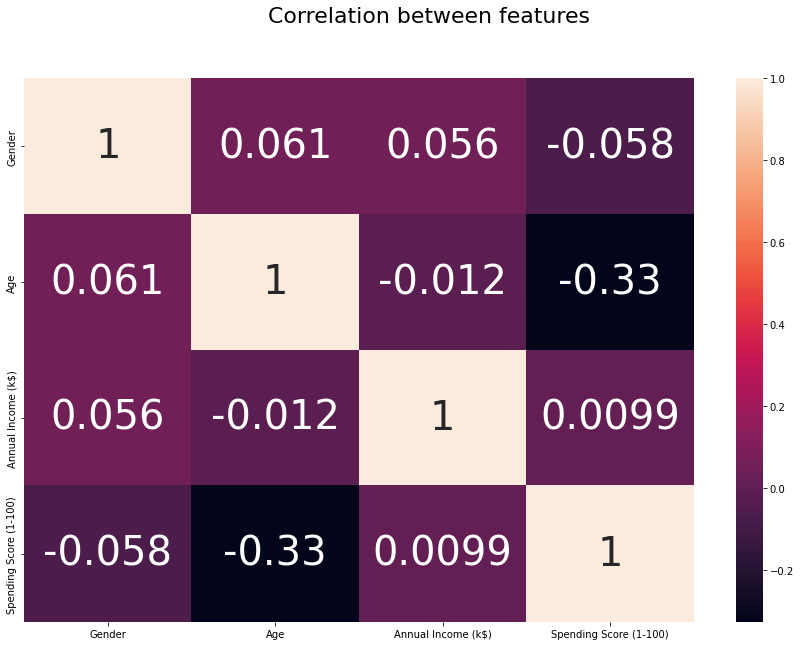

In [516]:
# Correlation between features
plt.subplots(figsize=(15,10))
plt.suptitle("Correlation between features", fontsize=22)
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 40})
plt.show();

# **Fuzzy - C - Means**

In [517]:
#copy the dataframe
fuzzy_df = df.copy()
fuzzy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [518]:
fcm = FCM(n_clusters=2)
fcm.fit(fuzzy_df.values)
fcm_centers = fcm.centers

In [519]:
fcm_centers


array([[ 0.42947302, 43.92254881, 54.10523588, 38.64027152],
       [ 0.43741267, 32.95828324, 70.39247087, 68.08470908]])

In [520]:
fcm_labels = fcm.predict(fuzzy_df.values)

In [521]:
#add predicted clusters to the dataset
fuzzy_df['Fuzzy_cluster'] = fcm_labels
fuzzy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,1
197,1,32,126,74,1
198,1,32,137,18,1


**PLOT**

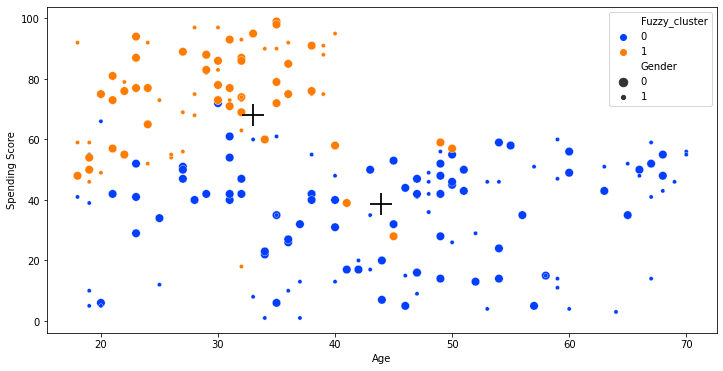

In [522]:
#plot clusters in the relationplot between age and Spending Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Fuzzy_cluster', size='Gender', data=fuzzy_df, palette = "bright")
sns.scatterplot(x=fcm_centers[:,1],y=fcm_centers[:,3], marker="+", s=500, color ='black')
plt.legend(loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show();

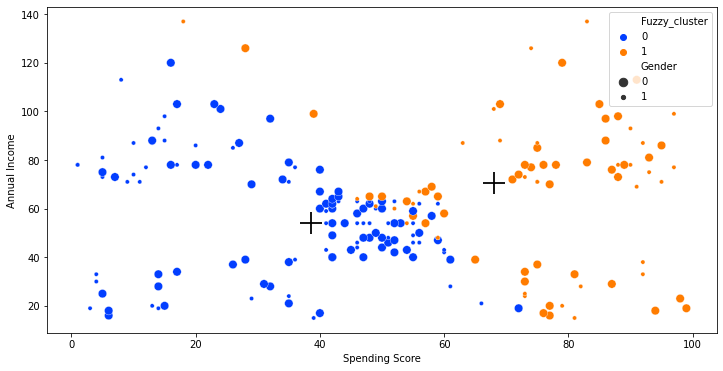

In [523]:
#plot clusters in the relationplot between Annual Income and Spending Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Spending Score (1-100)', y=r'Annual Income (k$)', hue='Fuzzy_cluster', size='Gender', data=fuzzy_df, palette = "bright")
sns.scatterplot(x=fcm_centers[:,3],y=fcm_centers[:,2], marker="+", s=500, color='black')
plt.legend(loc ="upper right")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.show();

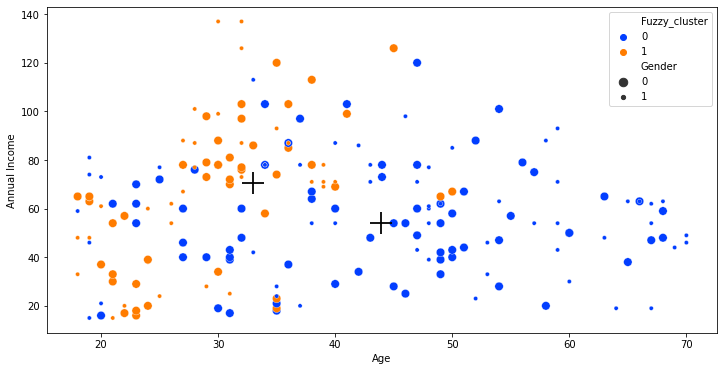

In [524]:
#plot clusters in the relationplot between age and Annual Income
plt.figure(figsize=(12,6))
sns.scatterplot(y='Annual Income (k$)', x='Age', hue='Fuzzy_cluster', size='Gender', data=fuzzy_df, palette = "bright")
sns.scatterplot(x=fcm_centers[:,1],y=fcm_centers[:,2], marker="+", s=500, color='black')
plt.legend(loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show();

**Get the membership function of the data**

In [525]:
MFs = fcm.soft_predict(df.values)
print(MFs)
print(MFs.shape)

[[0.65643168 0.34356832]
 [0.4674252  0.5325748 ]
 [0.69319233 0.30680767]
 [0.48276349 0.51723651]
 [0.70211645 0.29788355]
 [0.48253166 0.51746834]
 [0.72949562 0.27050438]
 [0.42247845 0.57752155]
 [0.72959928 0.27040072]
 [0.51212238 0.48787762]
 [0.73923523 0.26076477]
 [0.42087147 0.57912853]
 [0.75706828 0.24293172]
 [0.47099987 0.52900013]
 [0.74945922 0.25054078]
 [0.45918226 0.54081774]
 [0.74849608 0.25150392]
 [0.51939333 0.48060667]
 [0.78602971 0.21397029]
 [0.4076248  0.5923752 ]
 [0.7648677  0.2351323 ]
 [0.47809863 0.52190137]
 [0.75795079 0.24204921]
 [0.48760034 0.51239966]
 [0.78791136 0.21208864]
 [0.41883037 0.58116963]
 [0.81695821 0.18304179]
 [0.59482619 0.40517381]
 [0.81673445 0.18326555]
 [0.38915986 0.61084014]
 [0.76029726 0.23970274]
 [0.44024042 0.55975958]
 [0.77366423 0.22633577]
 [0.35624831 0.64375169]
 [0.80942588 0.19057412]
 [0.38183878 0.61816122]
 [0.82086472 0.17913528]
 [0.43283295 0.56716705]
 [0.84892235 0.15107765]
 [0.37832777 0.62167223]


**Add it to the dataset**

In [526]:

fuzzy_df['MF0'] = MFs[:,0]
fuzzy_df['MF1'] = MFs[:,1]

fuzzy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster,MF0,MF1
0,1,19,15,39,0,0.656432,0.343568
1,1,21,15,81,1,0.467425,0.532575
2,0,20,16,6,0,0.693192,0.306808
3,0,23,16,77,1,0.482763,0.517237
4,0,31,17,40,0,0.702116,0.297884
...,...,...,...,...,...,...,...
195,0,35,120,79,1,0.299287,0.700713
196,0,45,126,28,1,0.478315,0.521685
197,1,32,126,74,1,0.322849,0.677151
198,1,32,137,18,1,0.482839,0.517161


**Apply the Alpha cut**

In [527]:
#if MFi > alpha , then AMFi = 1, else AMFi = 0
alpha_cut = 0.5
fuzzy_df["AMF0"] = np.where(fuzzy_df.MF0 > alpha_cut, 1, 0)
fuzzy_df["AMF1"] = np.where(fuzzy_df.MF1 > alpha_cut, 1, 0)


In [528]:
fuzzy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster,MF0,MF1,AMF0,AMF1
0,1,19,15,39,0,0.656432,0.343568,1,0
1,1,21,15,81,1,0.467425,0.532575,0,1
2,0,20,16,6,0,0.693192,0.306808,1,0
3,0,23,16,77,1,0.482763,0.517237,0,1
4,0,31,17,40,0,0.702116,0.297884,1,0
...,...,...,...,...,...,...,...,...,...
195,0,35,120,79,1,0.299287,0.700713,0,1
196,0,45,126,28,1,0.478315,0.521685,0,1
197,1,32,126,74,1,0.322849,0.677151,0,1
198,1,32,137,18,1,0.482839,0.517161,0,1


In [529]:
AC_clusters = fuzzy_df[["AMF0", "AMF1"]]
AC_clusters = AC_clusters.to_numpy()
AC_clusters = np.argmax(AC_clusters,axis=1)
AC_clusters

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1])

In [530]:
fuzzy_df["AC_clusters"] = AC_clusters
fuzzy_df.head(20)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster,MF0,MF1,AMF0,AMF1,AC_clusters
0,1,19,15,39,0,0.656432,0.343568,1,0,0
1,1,21,15,81,1,0.467425,0.532575,0,1,1
2,0,20,16,6,0,0.693192,0.306808,1,0,0
3,0,23,16,77,1,0.482763,0.517237,0,1,1
4,0,31,17,40,0,0.702116,0.297884,1,0,0
5,0,22,17,76,1,0.482532,0.517468,0,1,1
6,0,35,18,6,0,0.729496,0.270504,1,0,0
7,0,23,18,94,1,0.422478,0.577522,0,1,1
8,1,64,19,3,0,0.729599,0.270401,1,0,0
9,0,30,19,72,0,0.512122,0.487878,1,0,0


# K-means

In [531]:
#copy the dataframe
kmean_df = df.copy()
kmean_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18



**Fitting and predicting the data**




In [532]:
km = KMeans(n_clusters=2) 
km_labels = km.fit_predict(kmean_df.values)

In [533]:
#get the centers
km_centers = km.cluster_centers_
km_centers

array([[ 0.44705882, 28.95294118, 62.17647059, 73.62352941],
       [ 0.43478261, 46.16521739, 59.36521739, 32.88695652]])

In [534]:
#add predicted clusters to the dataset
kmean_df['KMean_cluster'] = km_labels
kmean_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMean_cluster
0,1,19,15,39,1
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,0
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,1


**PLOT**

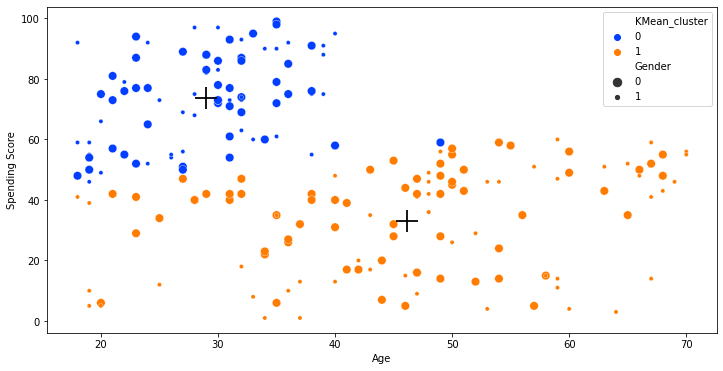

In [535]:
#plot clusters in the relationplot between age and Spending Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='KMean_cluster', size='Gender', data=kmean_df, palette = "bright")
sns.scatterplot(x=km_centers[:,1],y=km_centers[:,3], marker="+", s=500, color='black')
plt.legend(loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show();

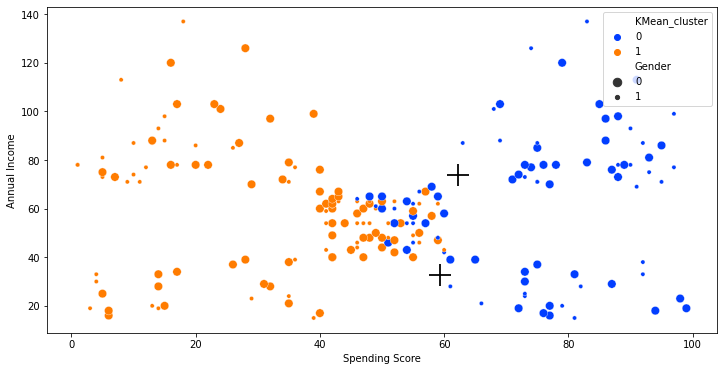

In [536]:
#plot clusters in the relationplot between Annual Income and Spending Score
plt.figure(figsize=(12,6))
sns.scatterplot(x='Spending Score (1-100)', y=r'Annual Income (k$)',
                hue='KMean_cluster', size='Gender', data=kmean_df, palette = "bright")
sns.scatterplot(x=km_centers[:,2],y=km_centers[:,3], marker="+", s=500, color='black')
plt.legend(loc ="upper right")
plt.ylabel("Annual Income")
plt.xlabel("Spending Score")
plt.show();

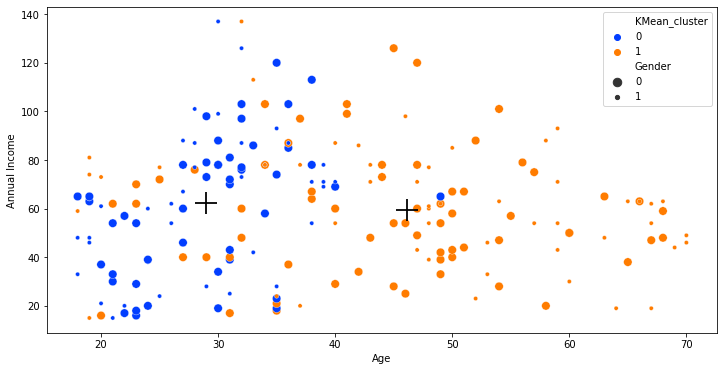

In [537]:
#plot clusters in the relationplot between Annual Income and age
plt.figure(figsize=(12,6))
sns.scatterplot(y='Annual Income (k$)', x='Age', hue='KMean_cluster', size='Gender', data=kmean_df, palette = "bright")
sns.scatterplot(x=km_centers[:,1],y=km_centers[:,2], marker="+", s=500, color='black')
plt.legend(loc ="upper right")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show();

# Conclusion

***we found that c means is better than k means in terms of accuracy and clustering but requires more time and computational power to compute***

# Data Summrization

In [538]:
Summary_df = df.copy()
Summary_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [539]:
Summary_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [540]:
Summary_df=Summary_df.values
no_sampels = len(Summary_df)
no_features = len(Summary_df[0])
print("\nTotal number of Sampels: ",no_sampels)
print("\nNumber of features: ",no_features)



Total number of Sampels:  200

Number of features:  4


In [541]:
Sampels_in_Class_zero = 0
Sampels_in_Class_one = 0
for i in AC_clusters:
  if AC_clusters[i]==1 : 
    Sampels_in_Class_zero = Sampels_in_Class_zero +1
  else:
    Sampels_in_Class_one = Sampels_in_Class_one + 1

print ('\n Number of sampels in First Class :',Sampels_in_Class_zero)
print ('\n Number of sampels in Second Class :',Sampels_in_Class_one)



 Number of sampels in First Class : 78

 Number of sampels in Second Class : 122


**And , There is no outliers**

# SVM

In [542]:
from sklearn.svm import SVR

In [543]:
Svm_df = df.copy()
Svm_df["Class"] = AC_clusters
Svm_df.head(20)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,0
5,0,22,17,76,1
6,0,35,18,6,0
7,0,23,18,94,1
8,1,64,19,3,0
9,0,30,19,72,0


In [544]:
from sklearn.model_selection import train_test_split
X =Svm_df.iloc[:,0:4]
y =Svm_df.iloc[:,4]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)
X.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [545]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn import svm
svm1 = svm.SVC(kernel='linear', C = 0.02)
svm1.fit(X_test,y_test)
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [546]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_test_pred)


array([[24,  0],
       [ 7,  9]])

In [547]:
accuracy_score(y_test,y_test_pred)


0.825

In [548]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df

,Actual,Predicted
92,0,0
126,0,0
36,0,0
169,1,0
154,0,0
167,1,1
186,0,0
96,0,0
67,0,0
123,1,1
